# `pheno_prerank_enrich()` Enrichment: Gene List with Rank Scores

### Step 1: Prepare `rank_df`

Begin by preparing a list of genes along with their preranked scores. Store this information in a DataFrame called `rank_df`.

- The **index** of `rank_df` should be the gene symbols.
- The **columns** of `rank_df` should correspond to one observation ID (e.g., sample or cell identifier).

This format allows `pheno_prerank_enrich` to perform enrichment analysis using phenotype-level ranked gene-level statistics.


In [5]:
%load_ext autoreload

import pandas as pd
rank_df = pd.read_csv("grea/data/ageing_muscle_gtex.tsv", index_col=0)
rank_df.columns = ['obs_0']
rank_df.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,obs_0
0,
ADO,-7.833439
CHUK,-7.800920
GOLGA4,-7.787221
EIF3J,-7.716298
GID4,-7.551146


### Step 2: Preparing Gene Set Libraries

There are several ways to prepare gene set libraries for use in GREA:

##### Option 1: Use Built-in Libraries
Simply specify the `libraries` you're interested in as a list. For example:

```python
libraries = ['KEGG_2021_Human', 'MSigDB_Hallmark_2020']
```

You can use the `grea.library.list_libraries()` function to view all available pathway libraries included in GREA.

##### Option 2: Load from GMT File
You can load external gene set libraries from `.gmt` files using:

```python
libraries = read_gmt('your_library_file.gmt')
```

##### Option 3: Define a Custom Library
Create your own gene set library using a Python dictionary, where each key is a pathway name and the corresponding value is a list of genes:

```python
libraries = {
    'term1': ['GOLGA4', 'GID4'],
    'term2': ['ADO', 'CHUK']
}
```

In [6]:
from grea.library import list_libraries

print(list_libraries())

['GeneSigDB', 'Enrichr_Submissions_TF-Gene_Coocurrence', 'SysMyo_Muscle_Gene_Sets', 'WikiPathway_2021_Human', 'HomoloGene', 'WikiPathways_2013', 'PFOCR_Pathways_2023', 'OMIM_Disease', 'Data_Acquisition_Method_Most_Popular_Genes', 'NIBR_Jensen_DISEASES_Curated_2025', 'Cancer_Cell_Line_Encyclopedia', 'WikiPathways_2016', 'WikiPathways_2015', 'RNAseq_Automatic_GEO_Signatures_Human_Up', 'Human_Gene_Atlas', 'KOMP2_Mouse_Phenotypes_2022', 'MoTrPAC_2023', 'Kinase_Perturbations_from_GEO_down', 'Disease_Signatures_from_GEO_down_2014', 'Disease_Perturbations_from_GEO_up', 'Old_CMAP_down', 'MCF7_Perturbations_from_GEO_up', 'NIH_Funded_PIs_2017_GeneRIF_ARCHS4_Predictions', 'PPI_Hub_Proteins', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Disease_Signatures_from_GEO_up_2014', 'GTEx_Tissue_Expression_Up', 'NIBR_DRUGseq_2025_down', 'L1000_Kinase_and_GPCR_Perturbations_up', 'ARCHS4_Cell-lines', 'VirusMINT', 'KEGG_2019_Human', 'ARCHS4_Tissues', 'MGI_Mammalian_Phenotype_Level_4', 'The_Kinase_Librar

### Step 3: Run Enrichment

To perform enrichment analysis, call the `grea.pheno_prerank_enrich(rank_df, libraries)` function. You can customize the analysis using the following arguments:

- **`prob_method`**: Method for p-value calculation. Currently supports `'perm'` for permutation-based testing.
- **`n_perm`**: Number of permutations to use for estimating the null distribution.


The function returns a GREA object containing all enrichment results, including enrichment scores and statistical significance for each library term.


In [7]:
%autoreload

from grea import grea
libraries = ['MSigDB_Hallmark_2020']
n_perm = 10
prob_method = 'perm'
obj = grea.pheno_prerank_enrich(rank_df, libraries,n_perm=n_perm, prob_method=prob_method)
obj

---Finished: Load MSigDB_Hallmark_2020 with 50 terms.
Low numer of permutations can lead to inaccurate p-value estimation. Symmetric Gamma distribution enabled to increase accuracy.


### Step 4: Check Enrichment Results

The `GREA` object stores all enrichment results, including enrichment scores and statistical significance for each library term. GREA supports three types of enrichment scores, each reflecting a different scoring strategy:

- `'KS-ES'`: Kolmogorov–Smirnov-based Enrichment Score, capturing the peak deviation between hit and miss distributions.
- `'KS-ESD'`: KS-based enrichment Score Difference, the sum of the maximum positive and negative deviations from the running score.
- `'RC-AUC'`: Area Under the Recovery Curve, summarizing early enrichment of target genes along the ranking.

You can select the appropriate metric depending on your analysis goal or data characteristics.

To retrieve the enrichment results as a DataFrame, use the `get_enrich_df(metric)` function.


In [8]:
%autoreload

df = obj.get_enrich_df(metric='KS-ES')
df.head()

,Term,Obs,Prob_method,KS-ES,KS-ES_pval,N_lead_sigs,Lead_sigs,KS-ES_fdr,KS-ES_sidak
0,MSigDB_Hallmark_2020|TNF-alpha Signaling via N...,obs_0,perm,0.273447,0.01,80,TRAF1;CCN1;MAP3K8;ETS2;IL6;GEM;CCRL2;SLC16A6;J...,0.013889,0.394994
1,MSigDB_Hallmark_2020|Hypoxia,obs_0,perm,0.241909,0.01,56,BGN;CAVIN3;MYH9;CP;CCN1;CCN5;GPC3;KDELR3;ENO2;...,0.013889,0.394994
2,MSigDB_Hallmark_2020|Cholesterol Homeostasis,obs_0,perm,0.371470,0.01,34,GUSB;ANXA5;CLU;LGALS3;S100A11;GPX8;ACTG1;PLSCR...,0.013889,0.394994
3,MSigDB_Hallmark_2020|Mitotic Spindle,obs_0,perm,-0.216591,0.01,35,CDC27;BIN1;NCK1;CDC42EP4;CDC42BPA;TUBA4A;WASL;...,0.013889,0.394994
4,MSigDB_Hallmark_2020|Wnt-beta Catenin Signaling,obs_0,perm,0.237338,0.40,9,DLL1;KAT2A;JAG2;CSNK1E;HDAC5;RBPJ;WNT6;JAG1;CCND2,0.408163,1.000000


In [9]:
%autoreload

df = obj.get_enrich_df(metric='KS-ESD')
df.head()

,Term,Obs,Prob_method,KS-ESD,KS-ESD_pval,N_lead_sigs,Lead_sigs,KS-ESD_fdr,KS-ESD_sidak
0,MSigDB_Hallmark_2020|TNF-alpha Signaling via N...,obs_0,perm,0.242230,0.01,80,TRAF1;CCN1;MAP3K8;ETS2;IL6;GEM;CCRL2;SLC16A6;J...,0.012821,0.394994
1,MSigDB_Hallmark_2020|Hypoxia,obs_0,perm,0.194804,0.01,56,BGN;CAVIN3;MYH9;CP;CCN1;CCN5;GPC3;KDELR3;ENO2;...,0.012821,0.394994
2,MSigDB_Hallmark_2020|Cholesterol Homeostasis,obs_0,perm,0.297184,0.01,34,GUSB;ANXA5;CLU;LGALS3;S100A11;GPX8;ACTG1;PLSCR...,0.012821,0.394994
3,MSigDB_Hallmark_2020|Mitotic Spindle,obs_0,perm,-0.079284,0.20,35,CDC27;BIN1;NCK1;CDC42EP4;CDC42BPA;TUBA4A;WASL;...,0.227273,0.999986
4,MSigDB_Hallmark_2020|Wnt-beta Catenin Signaling,obs_0,perm,0.193678,0.30,9,DLL1;KAT2A;JAG2;CSNK1E;HDAC5;RBPJ;WNT6;JAG1;CCND2,0.319149,1.000000


In [10]:
%autoreload

df = obj.get_enrich_df(metric='RC-AUC')
df.head()

,Term,Obs,Prob_method,RC-AUC,RC-AUC_pval,RC-AUC_fdr,RC-AUC_sidak
0,MSigDB_Hallmark_2020|TNF-alpha Signaling via N...,obs_0,perm,0.615675,0.01,0.021739,0.394994
1,MSigDB_Hallmark_2020|Hypoxia,obs_0,perm,0.591600,0.01,0.021739,0.394994
2,MSigDB_Hallmark_2020|Cholesterol Homeostasis,obs_0,perm,0.665746,0.01,0.021739,0.394994
3,MSigDB_Hallmark_2020|Mitotic Spindle,obs_0,perm,0.464843,0.70,0.990000,1.000000
4,MSigDB_Hallmark_2020|Wnt-beta Catenin Signaling,obs_0,perm,0.593906,0.30,0.535714,1.000000


### Step 5: Visualize Enrichment Results

To visualize the enrichment results, use the `pl_running_sum(metric, term, obs_id)` function by specifying the desired metric, term, and observation ID.


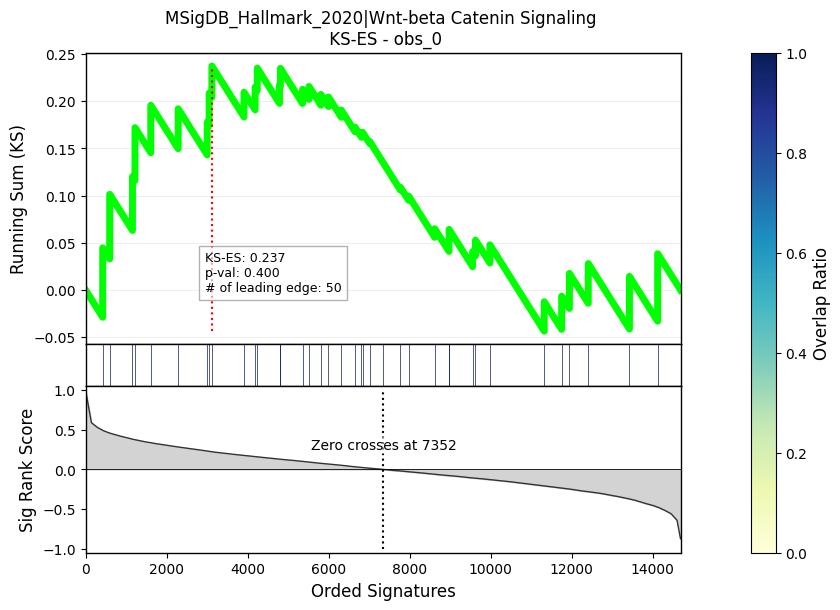

In [14]:
%autoreload
term = 'MSigDB_Hallmark_2020|Wnt-beta Catenin Signaling'
obs_id = 'obs_0'
fig = obj.pl_running_sum('KS-ES', term, obs_id)
fig

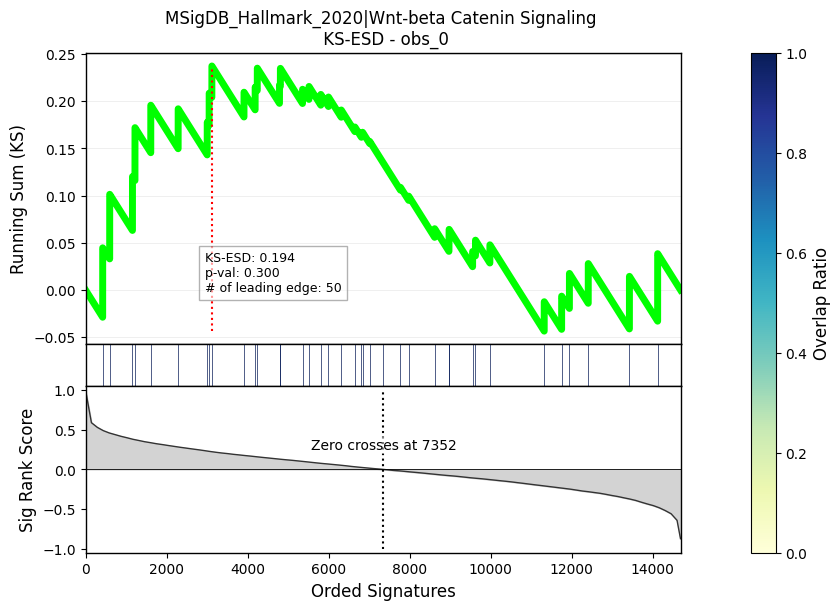

In [12]:
%autoreload
term = 'MSigDB_Hallmark_2020|Wnt-beta Catenin Signaling'
obs_id = 'obs_0'
fig = obj.pl_running_sum('KS-ESD', term, obs_id)
fig

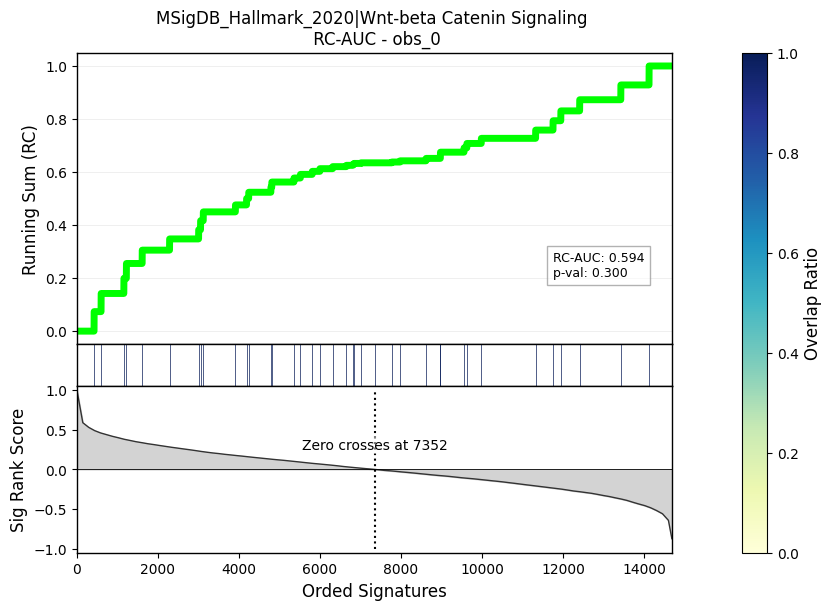

In [13]:
%autoreload
term = 'MSigDB_Hallmark_2020|Wnt-beta Catenin Signaling'
obs_id = 'obs_0'
fig = obj.pl_running_sum('RC-AUC', term, obs_id)
fig